In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


file_path = r"C:\Users\kaileshwar\Documents\vs\data science\heart_2020_cleaned.csv"
df = pd.read_csv(file_path)

categorical_cols = [
    "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory",
    "Race", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"
]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

# Convert target variable 'HeartDisease' into binary (Yes -> 1, No -> 0)
df["HeartDisease"] = df["HeartDisease"].map({"Yes": 1, "No": 0})

# Feature Scaling
scaler = StandardScaler()
numerical_cols = ["BMI", "SleepTime", "PhysicalHealth", "MentalHealth"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Splitting into training and testing sets
X = df.drop(columns=["HeartDisease"])  # Features
y = df["HeartDisease"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data Preparation Complete!")
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Data Preparation Complete!
Training set: (255836, 17), Testing set: (63959, 17)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path =r"C:\Users\kaileshwar\Documents\vs\data science\heart_2020_cleaned.csv"
df = pd.read_csv(file_path)


categorical_cols = [
    "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory",
    "Race", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"
]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

df["HeartDisease"] = df["HeartDisease"].map({"Yes": 1, "No": 0})


scaler = StandardScaler()
numerical_cols = ["BMI", "SleepTime", "PhysicalHealth", "MentalHealth"]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


X = df.drop(columns=["HeartDisease"]) 
y = df["HeartDisease"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9059

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.35      0.11      0.17      5475

    accuracy                           0.91     63959
   macro avg       0.63      0.55      0.56     63959
weighted avg       0.87      0.91      0.88     63959


Confusion Matrix:
[[57313  1171]
 [ 4850   625]]


In [8]:
import numpy as np
import pandas as pd

# Define a sample input dictionary (Replace values with user-specific data)
user_input = {
    "BMI": 28.5,
    "Smoking": "Yes",
    "AlcoholDrinking": "No",
    "Stroke": "No",
    "PhysicalHealth": 5,
    "MentalHealth": 3,
    "DiffWalking": "No",
    "Sex": "Male",
    "AgeCategory": "55-59",
    "Race": "White",
    "Diabetic": "No",
    "PhysicalActivity": "Yes",
    "GenHealth": "Good",
    "SleepTime": 7,
    "Asthma": "No",
    "KidneyDisease": "No",
    "SkinCancer": "No"
}

# Convert input into DataFrame with correct column order
input_df = pd.DataFrame([user_input])

# Ensure the feature order matches exactly as in training data
column_order = [
    "BMI", "Smoking", "AlcoholDrinking", "Stroke", "PhysicalHealth", "MentalHealth",
    "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity",
    "GenHealth", "SleepTime", "Asthma", "KidneyDisease", "SkinCancer"
]

# Reorder input columns
input_df = input_df[column_order]

# Encode categorical values
for col in categorical_cols:
    input_df[col] = label_encoders[col].transform(input_df[col])

# Scale numerical features
input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])

# Make prediction
prediction = rf_model.predict(input_df)[0]
prediction_label = "Heart Disease" if prediction == 1 else "No Heart Disease"

print(f"\nPrediction: {prediction_label}")



Prediction: No Heart Disease


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv(r"C:\Users\kaileshwar\Documents\vs\data science\heart_2020_cleaned.csv")

# Set plot style
sns.set_style("whitegrid")

# Define numerical and categorical columns
categorical_cols = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", 
                    "Race", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]
numerical_cols = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]


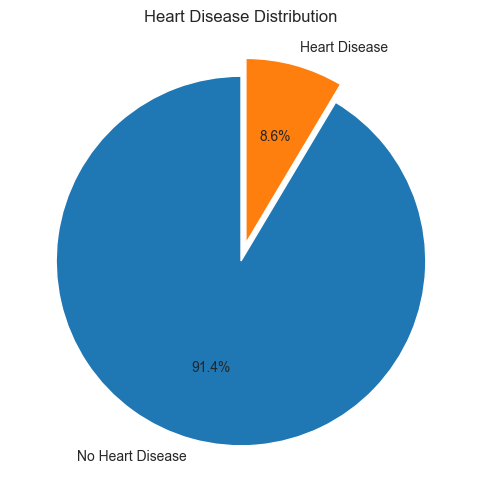

In [10]:
# Count occurrences of Heart Disease
heart_disease_counts = df["HeartDisease"].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(heart_disease_counts, labels=["No Heart Disease", "Heart Disease"], autopct="%1.1f%%", 
        colors=["#1f77b4", "#ff7f0e"], startangle=90, explode=(0, 0.1))
plt.title("Heart Disease Distribution")
plt.show()


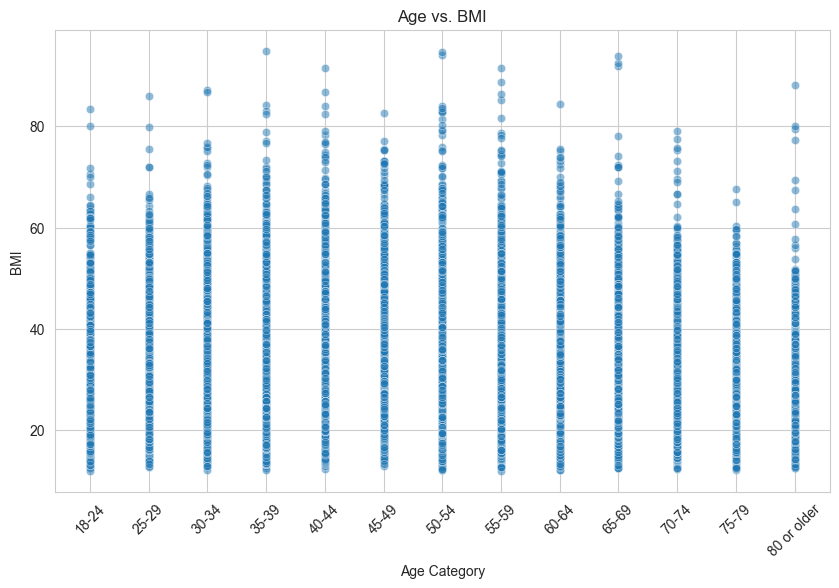

In [12]:
# Convert AgeCategory to numerical order for better plotting
def extract_age_number(age_str):
    """Extracts the lower bound of age ranges or assigns a high value for '80 or older'."""
    if age_str == "80 or older":
        return 80  # Assign a high value
    return int(age_str.split("-")[0])  # Extract the lower bound of age range

# Sort age categories correctly
age_order = sorted(df["AgeCategory"].unique(), key=extract_age_number)
df["AgeCategory"] = pd.Categorical(df["AgeCategory"], categories=age_order, ordered=True)

# Plot Age vs. BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["AgeCategory"].cat.codes, y=df["BMI"], alpha=0.5)
plt.xticks(ticks=range(len(age_order)), labels=age_order, rotation=45)
plt.xlabel("Age Category")
plt.ylabel("BMI")
plt.title("Age vs. BMI")
plt.show()


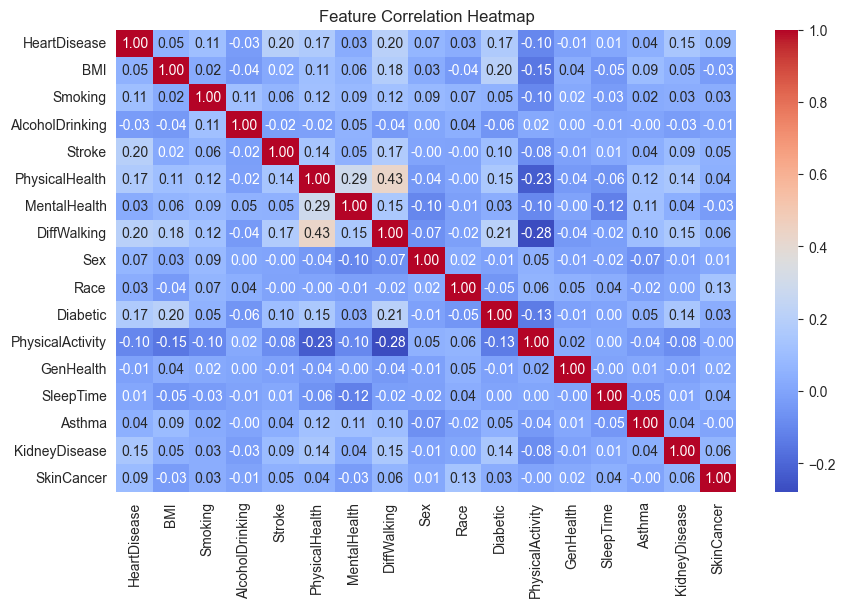

In [14]:
# Encode categorical variables as numbers for correlation calculation
df_encoded = df.copy()

# List of categorical columns to encode
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    if df[col].dtype == "object":
        df_encoded[col] = df_encoded[col].astype("category").cat.codes

# Remove any non-numeric columns (just in case)
df_encoded = df_encoded.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
print(df_encoded.dtypes)


HeartDisease           int32
BMI                  float64
Smoking                int32
AlcoholDrinking        int32
Stroke                 int32
PhysicalHealth       float64
MentalHealth         float64
DiffWalking            int32
Sex                    int32
AgeCategory         category
Race                   int32
Diabetic               int32
PhysicalActivity       int32
GenHealth              int32
SleepTime            float64
Asthma                 int32
KidneyDisease          int32
SkinCancer             int32
dtype: object


In [19]:
def handle_range_column(column):
    column = column.astype(str)  # Ensure it's a string for processing
    if column.str.contains("-").any():  # Check if it has ranges
        return column.apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x else x)
    return column


In [21]:
def handle_range_column(column):
    column = column.astype(str)  # Convert to string for processing
    if column.str.contains("-").any() or column.str.contains("or older").any():
        return column.apply(lambda x: 
            (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x 
            else 80 if '80 or older' in x 
            else x
        )
    return column


In [22]:
df_encoded["AgeCategory"] = handle_range_column(df_encoded["AgeCategory"]).astype(float)


In [23]:
print(df_encoded.dtypes)
print(df_encoded["AgeCategory"].unique())  # Check unique values


HeartDisease          int32
BMI                 float64
Smoking               int32
AlcoholDrinking       int32
Stroke                int32
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int32
Sex                   int32
AgeCategory         float64
Race                  int32
Diabetic              int32
PhysicalActivity      int32
GenHealth             int32
SleepTime           float64
Asthma                int32
KidneyDisease         int32
SkinCancer            int32
dtype: object
[57. 80. 67. 77. 42. 72. 62. 52. 47. 21. 37. 32. 27.]


Model Accuracy: 1.00


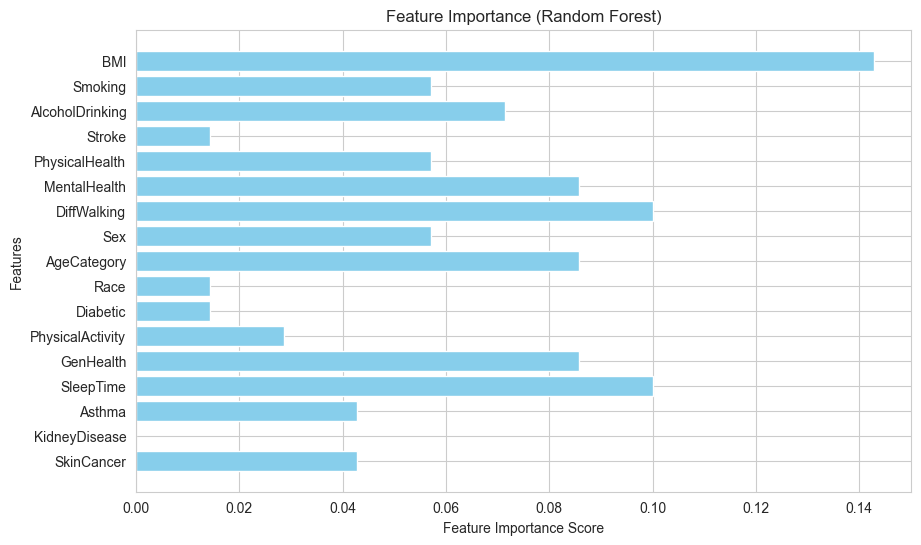

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Sample Data (Replace with actual dataset)
data = {
    "HeartDisease": [0, 1, 0, 1, 0],
    "BMI": [25.4, 30.2, 27.5, 29.1, 26.7],
    "Smoking": [1, 0, 1, 0, 1],
    "AlcoholDrinking": [0, 1, 0, 1, 0],
    "Stroke": [0, 0, 1, 0, 0],
    "PhysicalHealth": [3.0, 5.0, 2.0, 7.0, 1.0],
    "MentalHealth": [2.0, 6.0, 1.0, 8.0, 3.0],
    "DiffWalking": [0, 1, 0, 1, 0],
    "Sex": [1, 0, 1, 0, 1],
    "AgeCategory": ["18-24", "80 or older", "35-44", "55-64", "45-54"],
    "Race": [1, 2, 3, 4, 5],
    "Diabetic": [0, 1, 0, 1, 0],
    "PhysicalActivity": [1, 0, 1, 0, 1],
    "GenHealth": [3, 2, 4, 1, 5],
    "SleepTime": [7.0, 6.0, 8.0, 5.0, 7.5],
    "Asthma": [0, 1, 0, 1, 0],
    "KidneyDisease": [0, 0, 1, 0, 0],
    "SkinCancer": [1, 0, 0, 1, 0],
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to convert AgeCategory to numeric midpoints
def handle_range_column(column):
    column = column.astype(str)  # Convert to string for processing
    return column.apply(lambda x: 
        (int(x.split('-')[0]) + int(x.split('-')[1])) / 2 if '-' in x 
        else 80 if '80 or older' in x 
        else x
    ).astype(float)

# Apply conversion to AgeCategory
df["AgeCategory"] = handle_range_column(df["AgeCategory"])

# Split features and target variable
X = df.drop(columns=["HeartDisease"])
y = df["HeartDisease"]

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Feature Importance Plot
feature_importance = rf_model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()
